In [24]:
import numpy as np
import pandas as pd
import requests
import math
from astropy.constants import sigma_sb, L_sun
from bs4 import BeautifulSoup as BS

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

In [85]:
HZ_final = pd.read_csv('HZ_final.csv')

In [86]:
HZ_final.drop(columns = ['Unnamed: 0'], inplace = True)

In [87]:
HZ_final

,pl_name,pl_orbper_yrs,st_mass_x,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_bmasse,pl_bmassj,st_teff,...,ra,dec,sy_dist,spec_type,st_rad_m,st_lum,st_lum_sol,r_0,r_1,hab_zone
0,11 Com b,0.892621,2.650000,2,1,326.030000,1.250000,5800.150000,18.250000,4742.000,...,185.178779,17.793252,93.1846,G8 III,1.321830e+10,6.295337e+28,164.454999,17.615120,12.227205,0
1,11 UMi b,1.413333,2.093333,1,1,516.219985,1.526667,3818.094733,12.013333,4276.500,...,229.274595,71.823943,125.3210,K4 III,1.873868e+10,8.368613e+28,218.615798,20.309669,14.097576,0
2,14 And b,0.508802,1.700000,1,1,185.840000,0.755000,1271.250000,4.000000,4813.000,...,352.824150,39.235837,75.4392,K0 III,7.652700e+09,2.239311e+28,58.498199,10.505901,7.292474,0
3,14 Her b,4.836797,0.922000,1,1,1766.640004,2.819000,1506.354800,4.739667,5291.000,...,242.602101,43.816362,17.9323,K0 V,6.713505e+08,2.516931e+26,0.657505,1.113812,0.773131,0
4,16 Cyg B b,2.188528,1.025000,3,1,799.360000,1.660200,528.850360,1.664000,5732.750,...,295.465642,50.516824,21.1397,G2.5 V,7.861410e+08,4.756358e+26,1.242518,1.531135,1.062808,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,tau Gem b,0.835729,2.300000,1,1,305.250000,1.170000,6149.740000,19.350000,4435.000,...,107.784723,30.244954,112.5370,K2 III,1.931263e+10,1.028203e+29,268.600674,22.512080,15.626338,0
4220,ups And b,0.012638,1.216667,2,3,4.615874,0.058744,221.177432,0.695920,6152.755,...,24.198353,41.403815,13.4054,F8 V,1.113120e+09,1.265272e+27,3.305309,2.497285,1.733444,0
4221,ups And c,0.658595,1.225000,2,3,240.552000,0.827693,646.049650,2.032750,6105.510,...,24.198353,41.403815,13.4054,F8 V,1.113120e+09,1.226855e+27,3.204951,2.459081,1.706925,0
4222,ups And d,3.523723,1.225000,2,3,1287.040000,2.530823,1284.154475,4.040500,6105.510,...,24.198353,41.403815,13.4054,F8 V,1.113120e+09,1.226855e+27,3.204951,2.459081,1.706925,0


In [88]:
HZ_final['log_lum'] = np.log(HZ_final.st_lum)

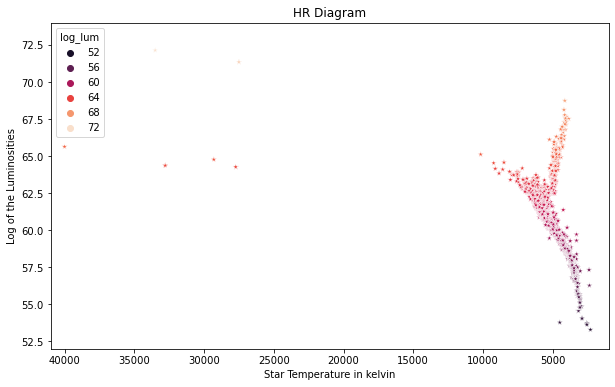

In [148]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(ax = ax, x = 'st_teff', y = 'log_lum', data = HZ_final, marker='*', hue = 'log_lum', palette="rocket")
ax.set_ylim(52,74)
ax.set_xlim(41000, 1000)
ax.set_title('HR Diagram')
ax.set_xlabel('Star Temperature in kelvin')
ax.set_ylabel('Log of the Luminosities')
plt.savefig('HR_diagram.png');

In [90]:
spec_list_values = HZ_final.spec_type.values

In [91]:
spec_ty_count = {}

for i in range(65, 87):
    let = chr(i)
    lst = [x for x in spec_list_values if x.startswith(let)]
    if lst:
        spec_ty_count[let] = lst

In [92]:
spec_count = {k: len(v) for k, v in spec_ty_count.items()}

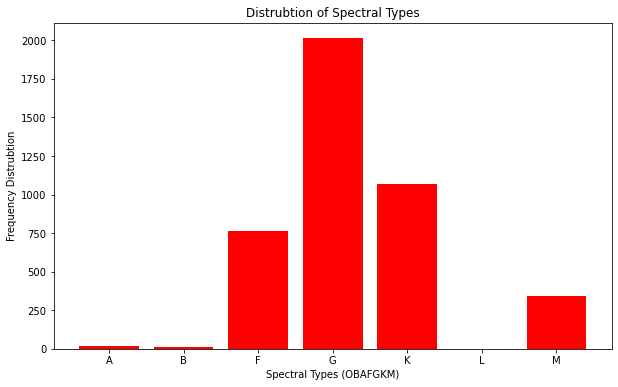

In [149]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.bar(spec_count.keys(), spec_count.values(), color='red')
ax.set_title('Distrubtion of Spectral Types')
ax.set_xlabel('Spectral Types (OBAFGKM)')
ax.set_ylabel('Frequency Distrubtion');
plt.savefig('Dist_Spec_Types.png')

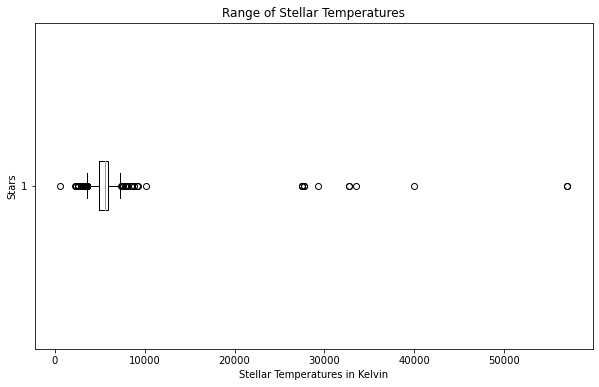

In [140]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(HZ_final.st_teff, vert = False )
ax.set_title('Range of Stellar Temperatures')
ax.set_xlabel('Stellar Temperatures in Kelvin')
ax.set_ylabel('Stars');

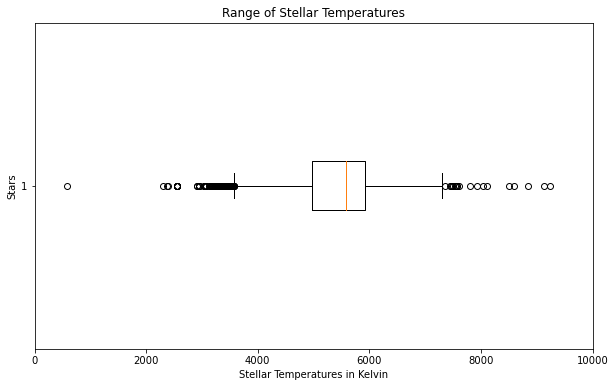

In [139]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(HZ_final.st_teff, vert = False )
ax.set_xlim(0, 10000)
ax.set_title('Range of Stellar Temperatures')
ax.set_xlabel('Stellar Temperatures in Kelvin')
ax.set_ylabel('Stars');

In [96]:
heatmapHZ = HZ_final.drop(columns = ['pl_name', 'spec_type'])

In [97]:
heatmapHZ

,pl_orbper_yrs,st_mass_x,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_bmasse,pl_bmassj,st_teff,st_mass_y,...,ra,dec,sy_dist,st_rad_m,st_lum,st_lum_sol,r_0,r_1,hab_zone,log_lum
0,0.892621,2.650000,2,1,326.030000,1.250000,5800.150000,18.250000,4742.000,2.650000,...,185.178779,17.793252,93.1846,1.321830e+10,6.295337e+28,164.454999,17.615120,12.227205,0,66.312192
1,1.413333,2.093333,1,1,516.219985,1.526667,3818.094733,12.013333,4276.500,2.093333,...,229.274595,71.823943,125.3210,1.873868e+10,8.368613e+28,218.615798,20.309669,14.097576,0,66.596871
2,0.508802,1.700000,1,1,185.840000,0.755000,1271.250000,4.000000,4813.000,1.700000,...,352.824150,39.235837,75.4392,7.652700e+09,2.239311e+28,58.498199,10.505901,7.292474,0,65.278551
3,4.836797,0.922000,1,1,1766.640004,2.819000,1506.354800,4.739667,5291.000,0.922000,...,242.602101,43.816362,17.9323,6.713505e+08,2.516931e+26,0.657505,1.113812,0.773131,0,60.790253
4,2.188528,1.025000,3,1,799.360000,1.660200,528.850360,1.664000,5732.750,1.025000,...,295.465642,50.516824,21.1397,7.861410e+08,4.756358e+26,1.242518,1.531135,1.062808,0,61.426695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,0.835729,2.300000,1,1,305.250000,1.170000,6149.740000,19.350000,4435.000,2.300000,...,107.784723,30.244954,112.5370,1.931263e+10,1.028203e+29,268.600674,22.512080,15.626338,0,66.802781
4220,0.012638,1.216667,2,3,4.615874,0.058744,221.177432,0.695920,6152.755,1.216667,...,24.198353,41.403815,13.4054,1.113120e+09,1.265272e+27,3.305309,2.497285,1.733444,0,62.405085
4221,0.658595,1.225000,2,3,240.552000,0.827693,646.049650,2.032750,6105.510,1.225000,...,24.198353,41.403815,13.4054,1.113120e+09,1.226855e+27,3.204951,2.459081,1.706925,0,62.374252
4222,3.523723,1.225000,2,3,1287.040000,2.530823,1284.154475,4.040500,6105.510,1.225000,...,24.198353,41.403815,13.4054,1.113120e+09,1.226855e+27,3.204951,2.459081,1.706925,0,62.374252


In [98]:
corr = HZ_final.corr()

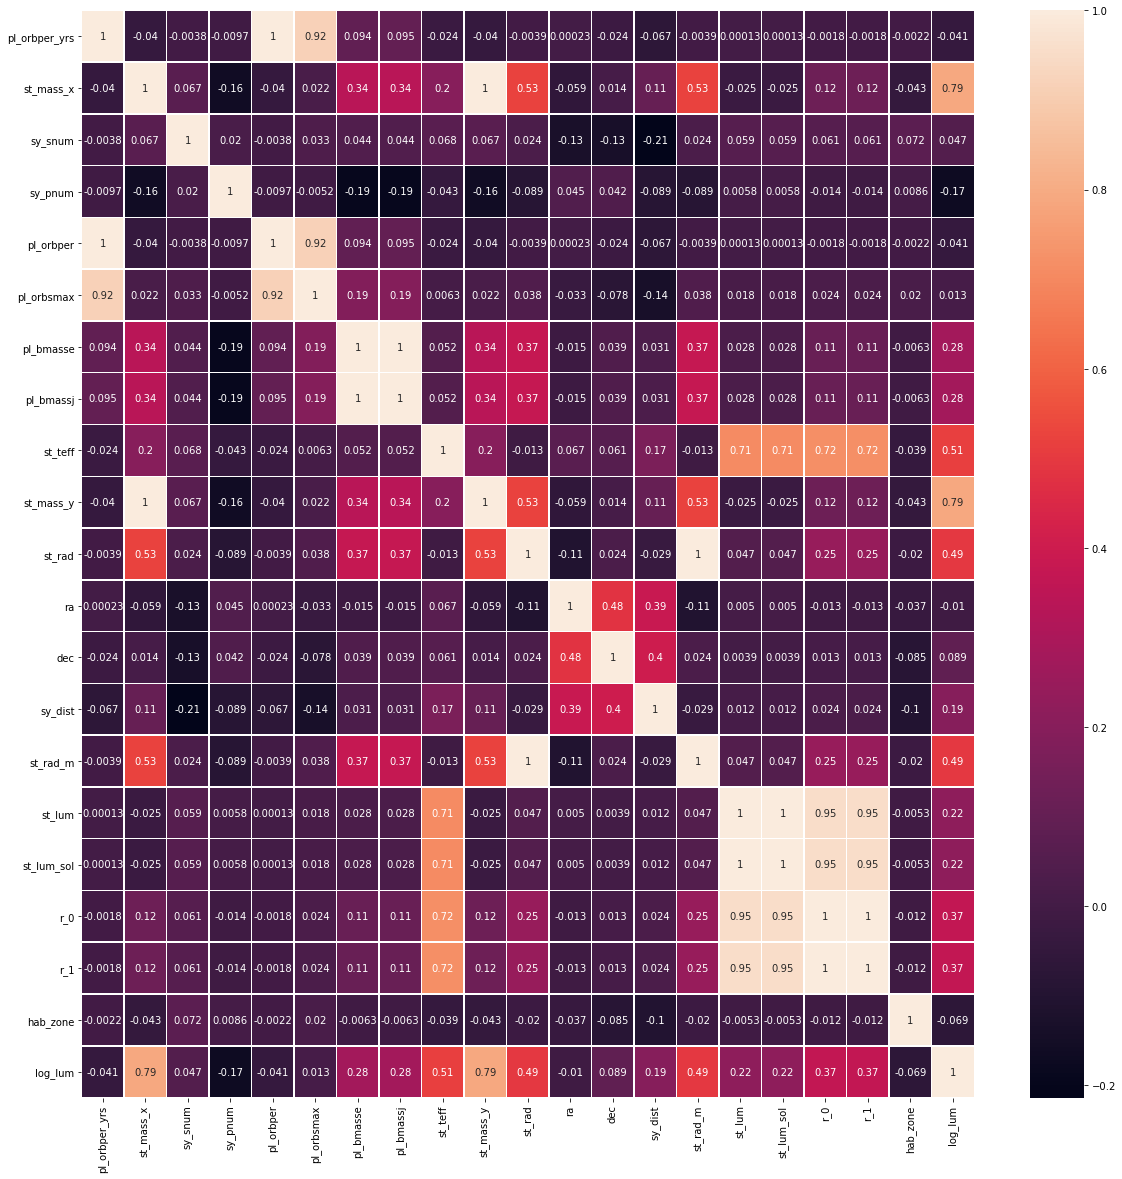

In [99]:
fig, ax=plt.subplots(figsize=(20,20))
ax = sns.heatmap(corr, linewidth=0.5, annot=True)
plt.show()

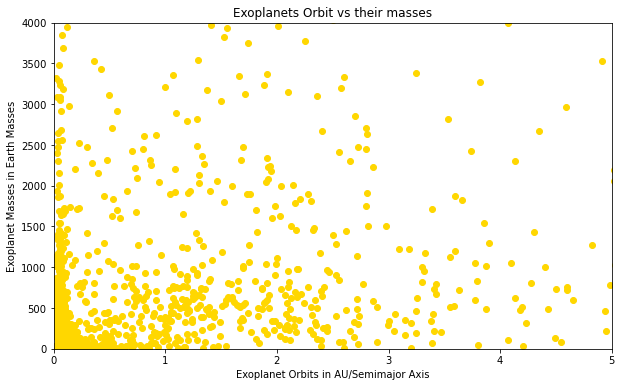

In [138]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(HZ_final.pl_orbsmax, HZ_final.pl_bmasse, color='gold' )
ax.set_xlim(0, 5)
ax.set_ylim(0, 4000)
ax.set_title('Exoplanets Orbit vs their masses')
ax.set_xlabel('Exoplanet Orbits in AU/Semimajor Axis')
ax.set_ylabel('Exoplanet Masses in Earth Masses');

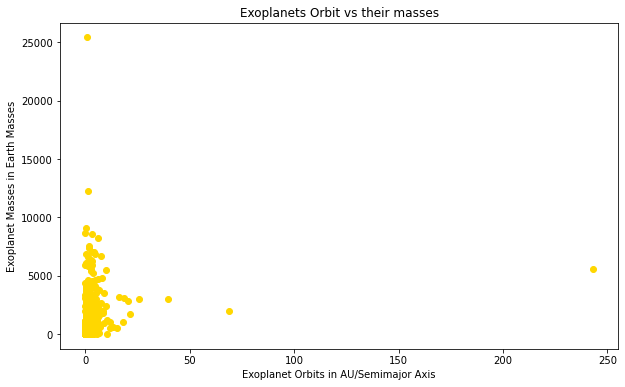

In [137]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(HZ_final.pl_orbsmax, HZ_final.pl_bmasse, color='gold')
ax.set_title('Exoplanets Orbit vs their masses')
ax.set_xlabel('Exoplanet Orbits in AU/Semimajor Axis')
ax.set_ylabel('Exoplanet Masses in Earth Masses');

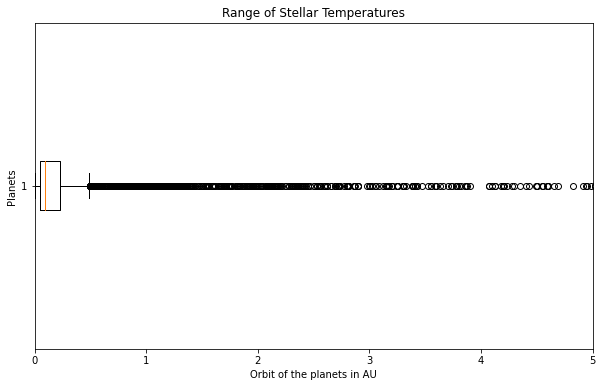

In [136]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(HZ_final.pl_orbsmax, vert = False )
ax.set_xlim(0,5)
ax.set_title('Range of Stellar Temperatures')
ax.set_xlabel('Orbit of the planets in AU')
ax.set_ylabel('Planets');

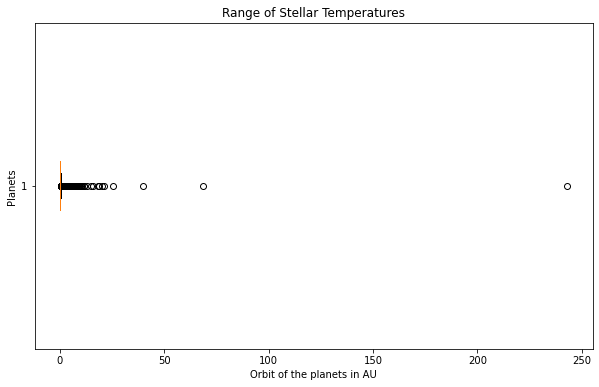

In [135]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(HZ_final.pl_orbsmax, vert = False )
ax.set_title('Range of Stellar Temperatures')
ax.set_xlabel('Orbit of the planets in AU')
ax.set_ylabel('Planets');

In [128]:
HZ_final.hab_zone.value_counts().values

array([4124,  100])

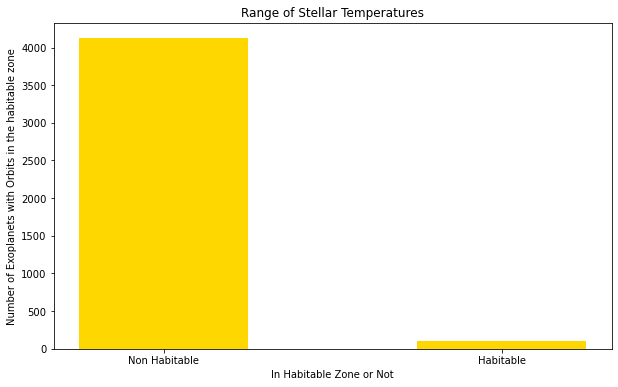

In [150]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.bar(['Non Habitable', 'Habitable'], HZ_final.hab_zone.value_counts().values, width = 0.5, color = 'gold')
ax.set_title('Range of Stellar Temperatures')
ax.set_xlabel('In Habitable Zone or Not')
ax.set_ylabel('Number of Exoplanets with Orbits in the habitable zone')
plt.savefig('Class_Imbalance.png');

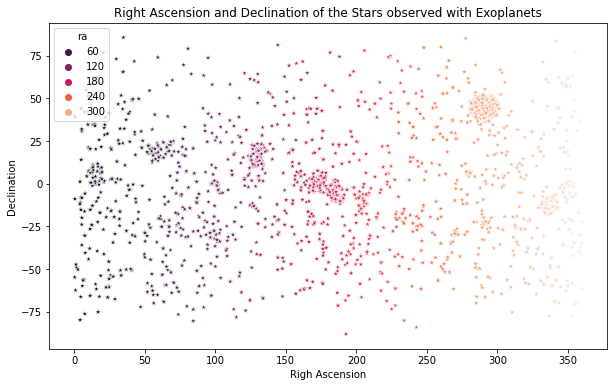

<Figure size 432x288 with 0 Axes>

In [151]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(ax = ax, x = 'ra', y = 'dec', data = HZ_final, marker='*', hue ='ra', palette="rocket")
ax.set_title('Right Ascension and Declination of the Stars observed with Exoplanets')
ax.set_xlabel('Righ Ascension')
ax.set_ylabel('Declination')
plt.show()
plt.savefig('RA_DEC_map.png')